In [11]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from CO2simulation import CO2simulation
import runCO2simulation as simCO2
import matplotlib.pyplot as plt
import numpy as np
import visualizeCO2 as vco2
import matplotlib as mpl
from display_notebook import css_styling
from IPython.display import Image
mpl.rcdefaults()
mpl.matplotlib_fname()
css_styling() # suppress matplotlibrc

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Scalable Kalman filtering for Temporal-Spatial Analysis
* ### Seismic monitoring of CO$_2$
    * State estimation
    * Time-series data
* ### Methodology
    * Kalman filter
    * Scalability
* ### Result
[Visit my GitHub page!](https://github.com/judithyueli?tab=contributions&from=2015-08-04)


## Track a CO$_2$ Plume from Sensor Measurements

Objective: monitor a CO$_2$ plume for $5$ days resulted from injecting $300$ tons of CO$_2$ at a depth of $1657m$.

<img src="figure/field_experiment.png" alt="Drawing" style="width: 600px;"/>
* The sensor measures the travel time of a seismic signal from a source to a receiver.

* The presence of CO$_2$ slows down the seismic signal and causes travel time delay along a ray path. 

* Goal: interpret the changes in seismic signals into maps of moving CO$_2$ plume.
    

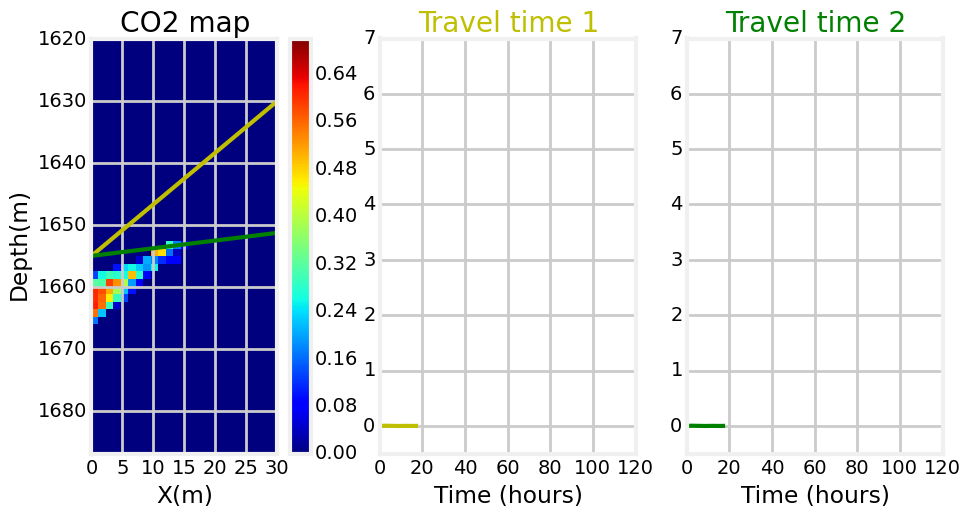

None

In [3]:
from IPython.html.widgets import interact, interactive, fixed
from IPython.html.widgets import FloatSlider
from CO2simulation import CO2simulation
def plot_CO2plume(time):
    import param as param
    CO2 = CO2simulation(param)
    x = CO2.extract_state(int(time/3))
    data = CO2.extract_data(int(time/3))
    fig_setting = vco2.getImgParam(param)
    vco2.plotCO2_data_map(x, data, 0, 20, fig_setting)
    plt.show()
    
interact(plot_CO2plume,
         time = FloatSlider(value=0, min=0, max=120));

## Kalman filtering
* Linear dynamic system, estimation, inference
* Two phases:
    - Prediction
    - Update
<img src="figure/KF.png" alt="Drawing" style="width: 1000px;"/>

## Scalability Issues
* Computationally prohibitive for large-scale problem
* Store and update covariance matrix ($N^2$) at each Kalman step
* Computational cost grows quadratically with $N$
* $80$ days for a typical problem size ~1 million

| Resolution       | Low           | Medium      | High             |
| ---------------- |:-------------:|:-----------:|:----------------:|
| State dimension  |N = 3245       | N = 3245 x 4| N = 3245 x 16    |
| Run time     | 1.2 min       | 19 minutes  |  4.4 hours       |
| Storage cost     | 100 MB        | 1331 MB     |  20 G            |


## Scalable Kalman filtering

* $\mathcal{O}(N)$: a linear computational complexity algorithm
* Conventional dimension reduction algorithms (e.g.,PCA) truncates information
* Lossless compression for a kernel covariance matrix
* Hierarchical matrices approach efficiently explore the structure of a kernel matrix

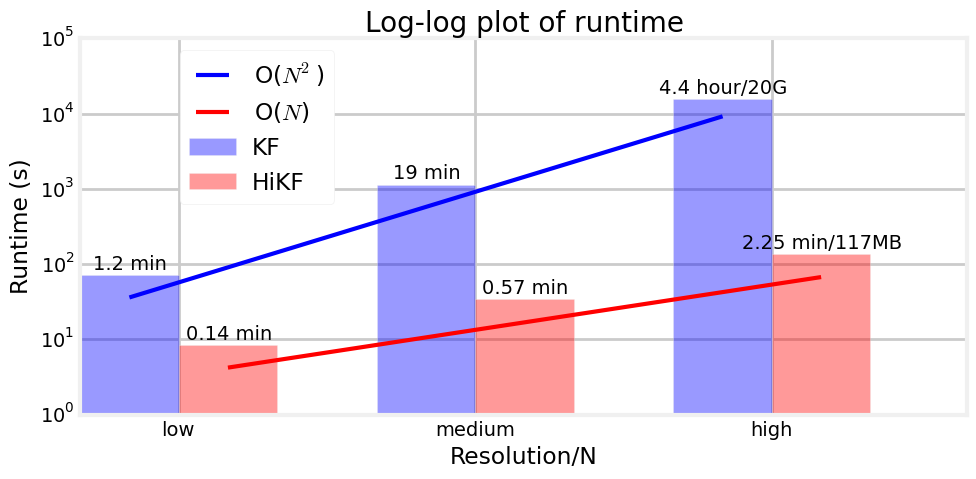

In [4]:
import visualizeCO2 as vCO2
vCO2.scale_barplot()

## Results

                                        TRUE                             HIKF
<img src="figure/co2movie.gif" alt="Drawing" style="width: 800px;"/>


## Filter Design

### By choosing an appropriate $Q/R$ ratio to optimize the filter preformance 

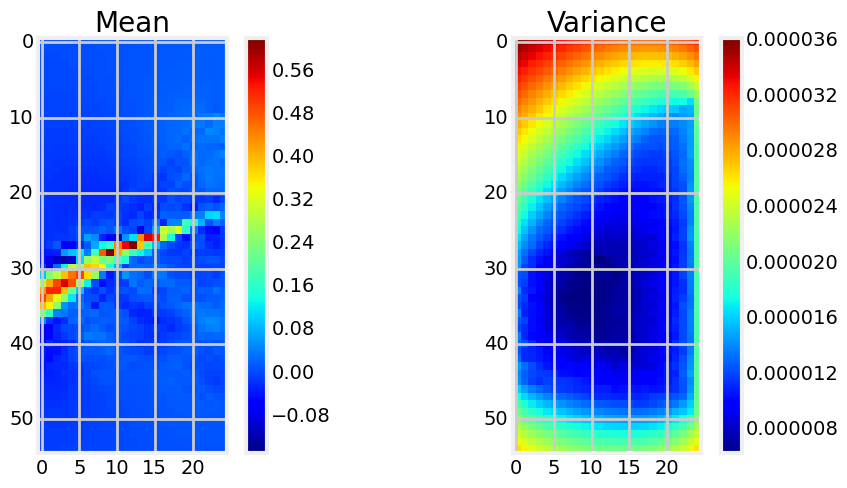

Theta                  Variance
 1.140000              0.083414


None

In [5]:
# theta controls the trade-off between data misfit and variance in final estimates
def plot_CO2maps(theta):
    import param
    CO2 = CO2simulation(param)
    param.theta = (theta,1e-5)
    hikf, x_kf, cov_kf = simCO2.CO2_filter(CO2, param)
    fig_setting = vco2.getImgParam(param)
    vco2.plotCO2map(x_kf,cov_kf,fig_setting)
    plt.show()
    print "Theta                  Variance"
    print " %f              %f" % (theta,np.sum(cov_kf[-1]))
    
interact(plot_CO2maps,
         theta = FloatSlider(value=1.14, min=1.14e-3, max=1.14e1, step=1));

## Summary
Efficient tools to __interprete the time-series data recorded in the seismic sensors into spatial maps of a moving CO$_2$ plume__, a problem very similar to CT scanning widely used in medical imaging.